# Data Transformation/ Normalization

In [5]:
# import libararies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# generate non-normal data
np.random.seed(0)
df = np.random.exponential(size=100, scale=2)
df = pd.DataFrame(df,columns=['values'])

df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

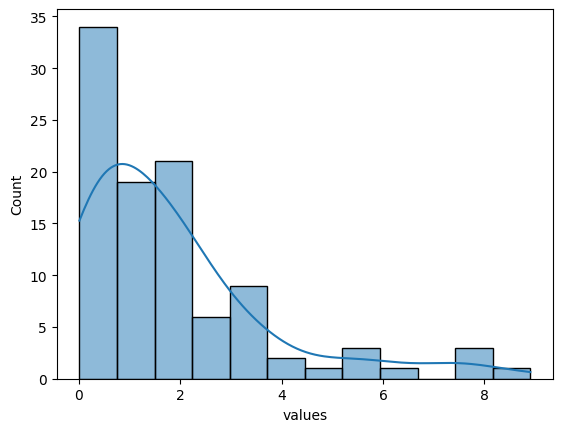

In [7]:
sns.histplot(df['values'], kde=True)

In [8]:
from sklearn.preprocessing import PowerTransformer
pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')

# data should be +ive for boxcox

df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']]+ 1) 
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])

In [9]:
df.head()

,values,Box_Cox,Yeo_Johnson
0,1.591749,0.265186,0.265186
1,2.511862,0.765195,0.765195
2,1.846446,0.426230,0.426230
3,1.574402,0.253406,0.253406
4,1.102097,-0.117999,-0.117999


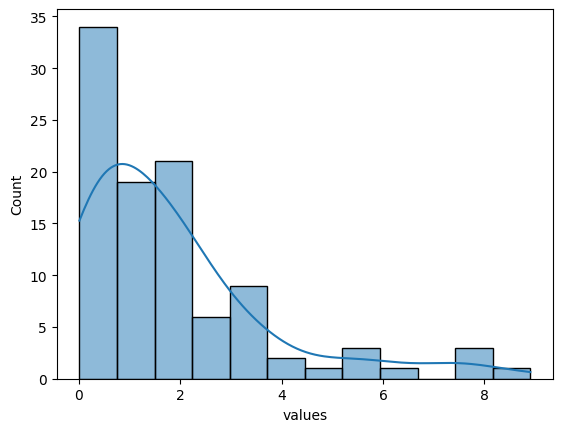

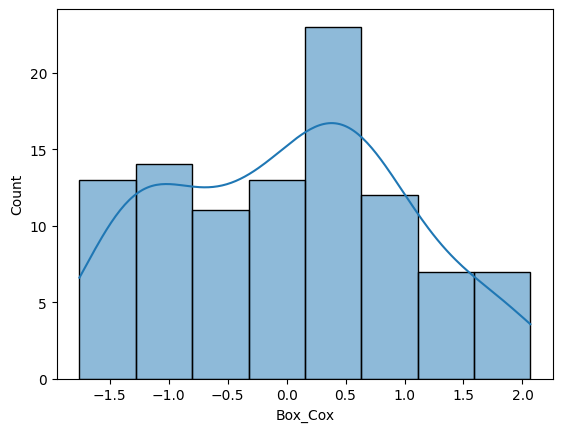

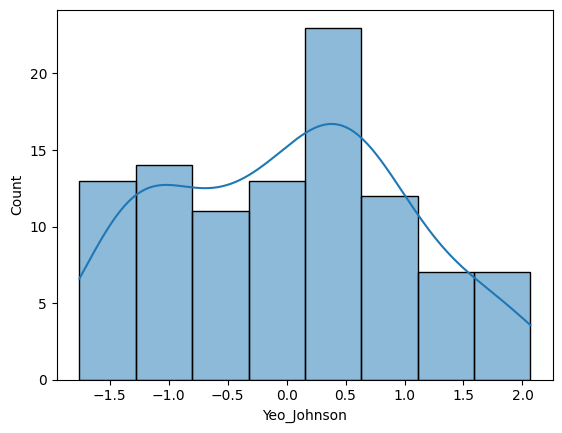

In [10]:
# create histogram for all columns
for col in df.columns:
    sns.histplot(df[col], kde =True)
    plt.show()

### Normalization 

L2

In [11]:
from sklearn.preprocessing import Normalizer
data = [[1,1,1], [1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


L 1      

In [12]:
from sklearn.preprocessing import Normalizer
data = [[1,1,1], [1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


# Log Transformation

In [13]:
import pandas as pd
import numpy as np

# making skewed data
df = {"values": [1,5,10,20,50,100,200,500,1000,2000,10,000]}



<Axes: ylabel='Count'>

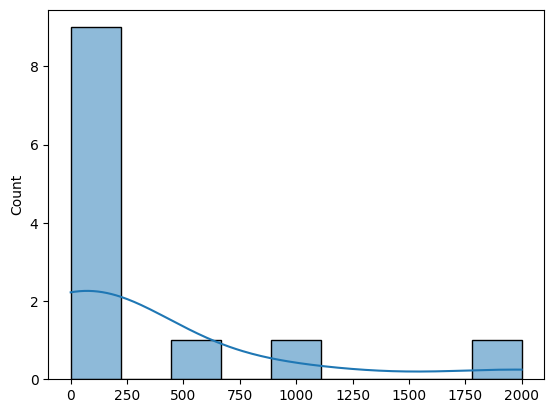

In [16]:
sns.histplot(df['values'], kde =True)

In [18]:
df['log_values'] = np.log(df['values'])


C:\Users\786\AppData\Local\Temp\ipykernel_6992\362062421.py:1: RuntimeWarning: divide by zero encountered in log
  df['log_values'] = np.log(df['values'])


## Scaling

Its primary goal is to change the range of the data without altering the shape of the distribution.This is especially important for algorithms that are sensitive to scale o the data,such as Support Vector Machine(SVM), or K-nearest neighbor(K-NN)

### Methods of Scaling:

1. MinMaxScaling(transform data to 0 and 1)

2. Standardization(standardize data to have mean 0 and variance 1)


### Uses: 

Scaling is used when you need to compare data that is measured on different scales like comparing income to number of years of education

## Normalization

It adjusts the scale of the data but also changes the shape of the distribution.It is used to transform features to be on a similar scale.This inclues transformingskewed data to approximate a normal distribution.


### Methods

1. log transformation
2. box-cox transormation
3. square root transformation

all of these reduces the skewness of the data.but do not work on -ive data.


### uses

typically used when data set has skewed distribution and algrithms used assume normality of the features.